In [1]:
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

### Load the data from the experiments

In [2]:
folder = Path("storage/synced")

# load all csv files in the folder using pandas
df = pd.concat([pd.read_csv(f) for f in folder.glob("*.csv")])
df["stride_series"].replace(np.NaN, False, inplace=True)
df['train_exc_limit'].replace(np.NaN, 0, inplace=True)
df["pretrained"].replace(np.NaN, False, inplace=True)
df["cv_rep"].replace(np.NaN, False, inplace=True)
df["eq_wdw_length"] = df["window_length"]*df["window_time_stride"]
df

,mode,arch,dataset,val_size,max_epochs,batch_size,pretrain_mode,window_length,window_time_stride,window_patt_stride,...,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,stride_series,val_mse,val_r2,eq_wdw_length
0,TS,RNN,GunPoint,0.25,120,128,False,10,1,1,...,200.0,256.0,256.0,15.087878,5999.429551,6014.517429,False,NaN,NaN,10
1,TS,RNN,GunPoint,0.25,120,128,False,30,1,1,...,200.0,256.0,256.0,16.702364,7802.926861,7819.629225,False,NaN,NaN,30
2,TS,RNN,GunPoint,0.25,120,128,False,50,1,1,...,200.0,256.0,256.0,14.063380,12719.526897,12733.590278,False,NaN,NaN,50
3,TS,RNN,GunPoint,0.25,120,128,False,70,1,1,...,200.0,256.0,256.0,13.355322,16511.897099,16525.252422,False,NaN,NaN,70
0,TS,CNN,CBF,0.25,120,128,False,10,1,1,...,200.0,384.0,384.0,16.327039,4555.706424,4572.033463,False,NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,TS,ResNet,CBF,0.25,120,128,False,30,1,1,...,200.0,384.0,384.0,32.624623,18318.241447,18350.866070,False,NaN,NaN,30
0,TS,CNN,GunPoint,0.25,120,128,False,70,1,1,...,200.0,256.0,256.0,11.789178,3181.567030,3193.356208,False,NaN,NaN,70
1,TS,CNN,GunPoint,0.25,120,128,False,10,1,1,...,200.0,256.0,256.0,17.889728,4996.665090,5014.554818,False,NaN,NaN,10
2,TS,CNN,GunPoint,0.25,120,128,False,30,1,1,...,200.0,256.0,256.0,15.275283,5111.519587,5126.794870,False,NaN,NaN,30


In [3]:
# check for duplicate entries
file_entries = len(df)
df = df.groupby(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
                 'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]).first().reset_index()
unique_entries = len(df)
print(f"{file_entries - unique_entries} duplicate entries removed")
# df = df.groupby(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
#                  'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]).count()
# df[df["val_size"] > 1]

0 duplicate entries removed


In [4]:
# show pretrained encoders
df[df["pretrain_mode"]==True][['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', 'window_time_stride', 'window_patt_stride', 'pretrained', "cv_rep"]]

,mode,arch,dataset,pretrain_mode,window_length,window_time_stride,window_patt_stride,pretrained,cv_rep
105,DF,CNN,CBF,True,10,1,1,False,0.0
106,DF,CNN,CBF,True,10,3,1,False,0.0
107,DF,CNN,CBF,True,10,5,1,False,0.0
108,DF,CNN,CBF,True,10,7,1,False,0.0
109,DF,CNN,CBF,True,10,7,2,False,0.0
110,DF,CNN,CBF,True,10,7,5,False,0.0
111,DF,CNN,CBF,True,10,3,1,False,0.0
112,DF,CNN,CBF,True,10,5,1,False,0.0
113,DF,CNN,CBF,True,10,7,1,False,0.0
114,DF,CNN,GunPoint,True,10,1,1,False,0.0


In [5]:
df[np.logical_and(df["stride_series"]==False, df["pretrain_mode"]==False)]

,mode,arch,dataset,pretrain_mode,window_length,stride_series,window_time_stride,window_patt_stride,train_exc_limit,pretrained,...,train_event_mult,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,val_mse,val_r2,eq_wdw_length
0,DF,CNN,CBF,False,10,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,22.343588,15246.313945,15268.657533,NaN,NaN,10
1,DF,CNN,CBF,False,10,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,17.290036,8260.709198,8277.999234,NaN,NaN,10
2,DF,CNN,CBF,False,10,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,16.378680,7241.490065,7257.868745,NaN,NaN,10
3,DF,CNN,CBF,False,10,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,20.827998,30601.648583,30622.476581,NaN,NaN,10
4,DF,CNN,CBF,False,10,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,24.910443,40097.799041,40122.709484,NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,TS,ResNet,GunPoint,False,70,False,1,1,32.0,False,...,4.0,200.0,256.0,256.0,14.099657,16973.339718,16987.439375,NaN,NaN,70
345,TS,ResNet,GunPoint,False,70,False,1,1,32.0,False,...,4.0,200.0,256.0,256.0,11.785377,4906.983006,4918.768383,NaN,NaN,70
346,TS,ResNet,GunPoint,False,70,False,1,1,32.0,False,...,4.0,200.0,256.0,256.0,22.317853,9153.016947,9175.334800,NaN,NaN,70
347,TS,ResNet,GunPoint,False,70,False,1,1,32.0,False,...,4.0,200.0,256.0,256.0,19.859330,9551.924702,9571.784032,NaN,NaN,70


In [6]:
cols = ['test_acc', 'test_f1', 'test_auroc', 'val_acc', 'val_f1', 'val_auroc']
df.columns

Index(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length',
       'stride_series', 'window_time_stride', 'window_patt_stride',
       'train_exc_limit', 'pretrained', 'cv_rep', 'val_size', 'max_epochs',
       'batch_size', 'learning_rate', 'random_state', 'nepochs', 'best_model',
       'total_params', 'trainable_params', 'metrics_csv', 'val_acc', 'val_f1',
       'val_auroc', 'test_acc', 'test_f1', 'test_auroc', 'exc',
       'train_strat_size', 'train_event_mult', 'nevents_test',
       'nevents_train_lim', 'nevents_train_tot', 'time_dm', 'time_train',
       'time_total', 'val_mse', 'val_r2', 'eq_wdw_length'],
      dtype='object')

# Section 5.1: Time Dilation Effects

- Check the dependence of time dilation on classifier performance

In [7]:
# Filter the data
data = df[df["pretrain_mode"] == False].copy()

data = data[data['train_exc_limit'] == 32]
data = data[data["window_patt_stride"] == 1]
data = data[data["pretrained"] == False]

data = data[data["dataset"] == "CBF"]

In [8]:
# Generate a table
data.groupby(["dataset", "mode", "arch", "eq_wdw_length"])[cols].mean()

test_acc   test_f1  test_auroc   val_acc  \
dataset mode arch   eq_wdw_length                                             
CBF     DF   CNN    10             0.479456  0.479456    0.237305  0.460838   
                    30             0.540099  0.540099    0.283795  0.566042   
                    50             0.666633  0.666633    0.352328  0.684269   
                    70             0.683403  0.683403    0.382501  0.686748   
             ResNet 10             0.436180  0.436180    0.226182  0.458803   
                    30             0.574055  0.574055    0.286938  0.573420   
                    50             0.639086  0.639086    0.341824  0.638680   
                    70             0.650178  0.650178    0.381164  0.661108   
        TS   CNN    10             0.402188  0.402188    0.238818  0.404835   
                    30             0.502413  0.502413    0.283836  0.502655   
                    50             0.638092  0.638092    0.336186  0.659878   
                    70             0.707768  0.707768    0.379669  0.725607   
             RNN    10             0.389167  0.389167    0.226458  0.413757   
                    30             0.499071  0.499071    0.267706  0.526344   
                    50             0.556160  0.556160    0.301545  0.621779   
                    70             0.573296  0.573296    0.308775  0.647976   
             ResNet 10             0.375269  0.375269    0.220735  0.395075   
                    30             0.504331  0.504331    0.286273  0.543669   
                    50             0.610611  0.610611    0.325185  0.653116   
                    70             0.658663  0.658663    0.350345  0.668867   

                                     val_f1  val_auroc  
dataset mode arch   eq_wdw_length                       
CBF     DF   CNN    10             0.460838   0.269778  
                    30             0.566042   0.315278  
                    50             0.684269   0.361016  
                    70             0.686748   0.397277  
             ResNet 10             0.458803   0.282407  
                    30             0.573420   0.326463  
                    50             0.638680   0.348275  
                    70             0.661108   0.386318  
        TS   CNN    10             0.404835   0.281415  
                    30             0.502655   0.318506  
                    50             0.659878   0.358707  
                    70             0.725607   0.413726  
             RNN    10             0.413757   0.281623  
                    30             0.526344   0.319475  
                    50             0.621779   0.358468  
                    70             0.647976   0.342885  
             ResNet 10             0.395075   0.278133  
                    30             0.543669   0.334794  
                    50             0.653116   0.369960  
                    70             0.668867   0.390226

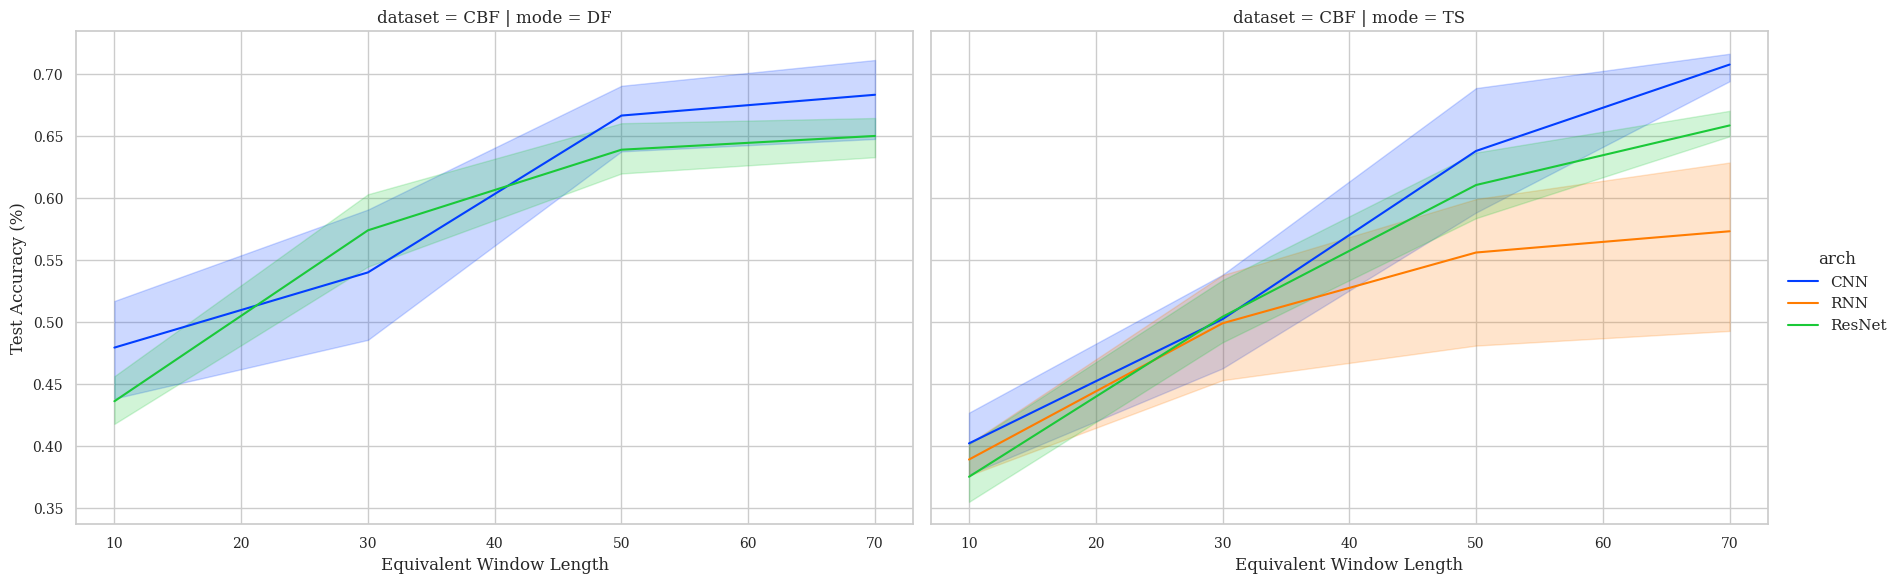

In [9]:
# Generate a plot
data["Method"] =  data["arch"] + "_" + data["mode"]
data.sort_values(["Method"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="eq_wdw_length", y="test_acc", hue='arch', kind="line", palette="bright", col="mode", row="dataset",
                height=6, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Equivalent Window Length");

g.savefig("figures/time_dilation.pdf", bbox_inches='tight')

# Section 5.2: Pattern Stride Effects

In [10]:
data = df[df["pretrain_mode"] == False].copy()

data = data[data['train_exc_limit'] == 32]
data = data[data["window_time_stride"] == 7]
data = data[data["pretrained"] == False]

data = data[data["dataset"] == "CBF"]

In [11]:
# Generate a table
data.groupby(["dataset", "mode", "arch", "window_patt_stride"])[cols].mean()

test_acc   test_f1  test_auroc  \
dataset mode arch   window_patt_stride                                   
CBF     DF   CNN    1                   0.683403  0.683403    0.382501   
                    2                   0.698954  0.698954    0.393141   
                    3                   0.683975  0.683975    0.385158   
                    5                   0.676501  0.676501    0.381147   
             ResNet 1                   0.650178  0.650178    0.381164   
                    2                   0.669568  0.669568    0.382667   
                    3                   0.645987  0.645987    0.374360   
                    5                   0.642156  0.642156    0.367039   

                                         val_acc    val_f1  val_auroc  
dataset mode arch   window_patt_stride                                 
CBF     DF   CNN    1                   0.686748  0.686748   0.397277  
                    2                   0.695159  0.695159   0.404444  
                    3                   0.701907  0.701907   0.397764  
                    5                   0.695175  0.695175   0.396082  
             ResNet 1                   0.661108  0.661108   0.386318  
                    2                   0.669535  0.669535   0.381230  
                    3                   0.652453  0.652453   0.368858  
                    5                   0.652975  0.652975   0.374385

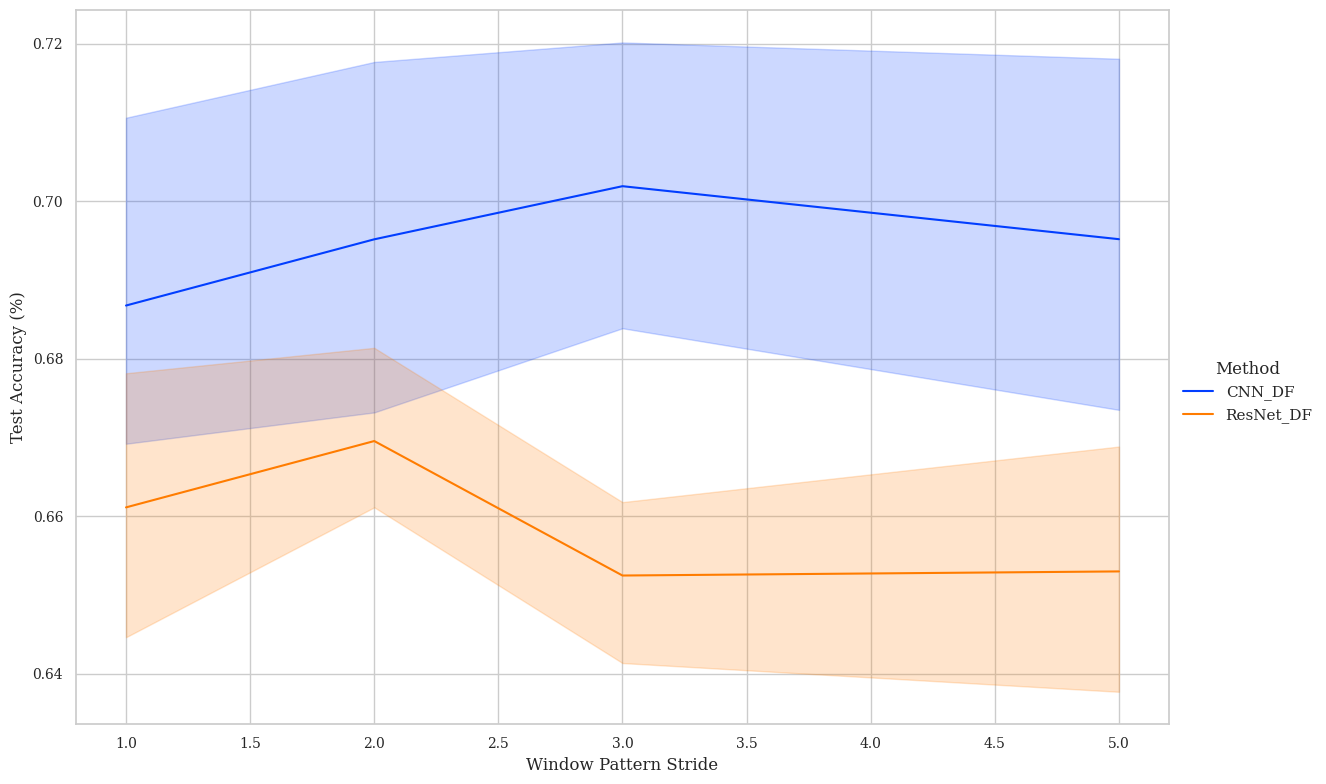

In [12]:
# Generate a plot
data["Method"] =  data["arch"] + "_" + data["mode"]
data.sort_values(["Method"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="window_patt_stride", y="val_acc", hue='Method', kind="line", palette="bright",
                height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Pattern Stride");

g.savefig("figures/pattern_stride_acc.pdf", bbox_inches='tight')

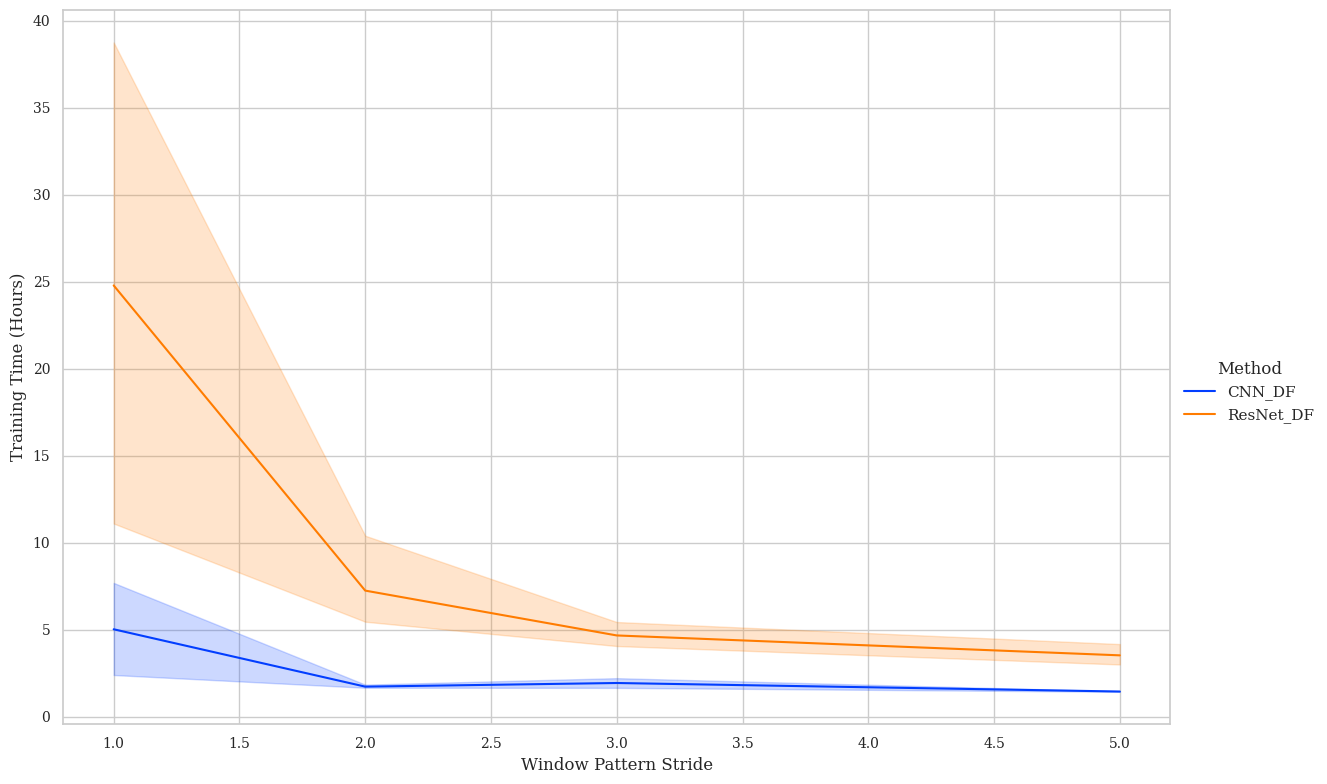

In [13]:
# Generate a plot

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

data["Time"] = data["time_train"]/60/60

g = sns.relplot(data=data, x="window_patt_stride", y='Time', hue='Method', kind="line", palette="bright",
                height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Training Time (Hours)")
g.set_xlabels("Window Pattern Stride");

g.savefig("figures/pattern_stride_time.pdf", bbox_inches='tight')

# Section 5.3: Self-Supervised Pretrain Effects

In [17]:
data = df[df["pretrain_mode"] == False].copy()

data = data[data["window_time_stride"] == 7]
data = data[data["window_patt_stride"] == 1]

data = data[data['train_exc_limit'] > 2]

data = data[data["dataset"] == "CBF"]

In [18]:
data.groupby(["dataset", "mode", "arch", "pretrained", "stride_series", 'train_exc_limit'])[cols].mean()

test_acc  \
dataset mode arch   pretrained stride_series train_exc_limit             
CBF     DF   CNN    False      False         4.0              0.443142   
                                             8.0              0.544831   
                                             16.0             0.620127   
                                             32.0             0.683403   
                    True       False         4.0              0.557813   
                                             8.0              0.644037   
                                             16.0             0.678613   
                                             32.0             0.717208   
                               True          4.0              0.580043   
                                             8.0              0.640419   
                                             16.0             0.686562   
                                             32.0             0.717764   
             ResNet False      False         4.0              0.430990   
                                             8.0              0.538512   
                                             16.0             0.604122   
                                             32.0             0.650178   
                    True       False         4.0              0.499918   
                                             8.0              0.624016   
                                             16.0             0.677535   
                                             32.0             0.704031   
                               True          4.0              0.491981   
                                             8.0              0.608464   
                                             16.0             0.671390   
                                             32.0             0.693878   

                                                               test_f1  \
dataset mode arch   pretrained stride_series train_exc_limit             
CBF     DF   CNN    False      False         4.0              0.443142   
                                             8.0              0.544831   
                                             16.0             0.620127   
                                             32.0             0.683403   
                    True       False         4.0              0.557813   
                                             8.0              0.644037   
                                             16.0             0.678613   
                                             32.0             0.717208   
                               True          4.0              0.580043   
                                             8.0              0.640419   
                                             16.0             0.686562   
                                             32.0             0.717764   
             ResNet False      False         4.0              0.430990   
                                             8.0              0.538512   
                                             16.0             0.604122   
                                             32.0             0.650178   
                    True       False         4.0              0.499918   
                                             8.0              0.624016   
                                             16.0             0.677535   
                                             32.0             0.704031   
                               True          4.0              0.491981   
                                             8.0              0.608464   
                                             16.0             0.671390   
                                             32.0             0.693878   

                                                              test_auroc  \
dataset mode arch   pretrained stride_series train_exc_limit               
CBF     DF   CNN    False      False         4.0            

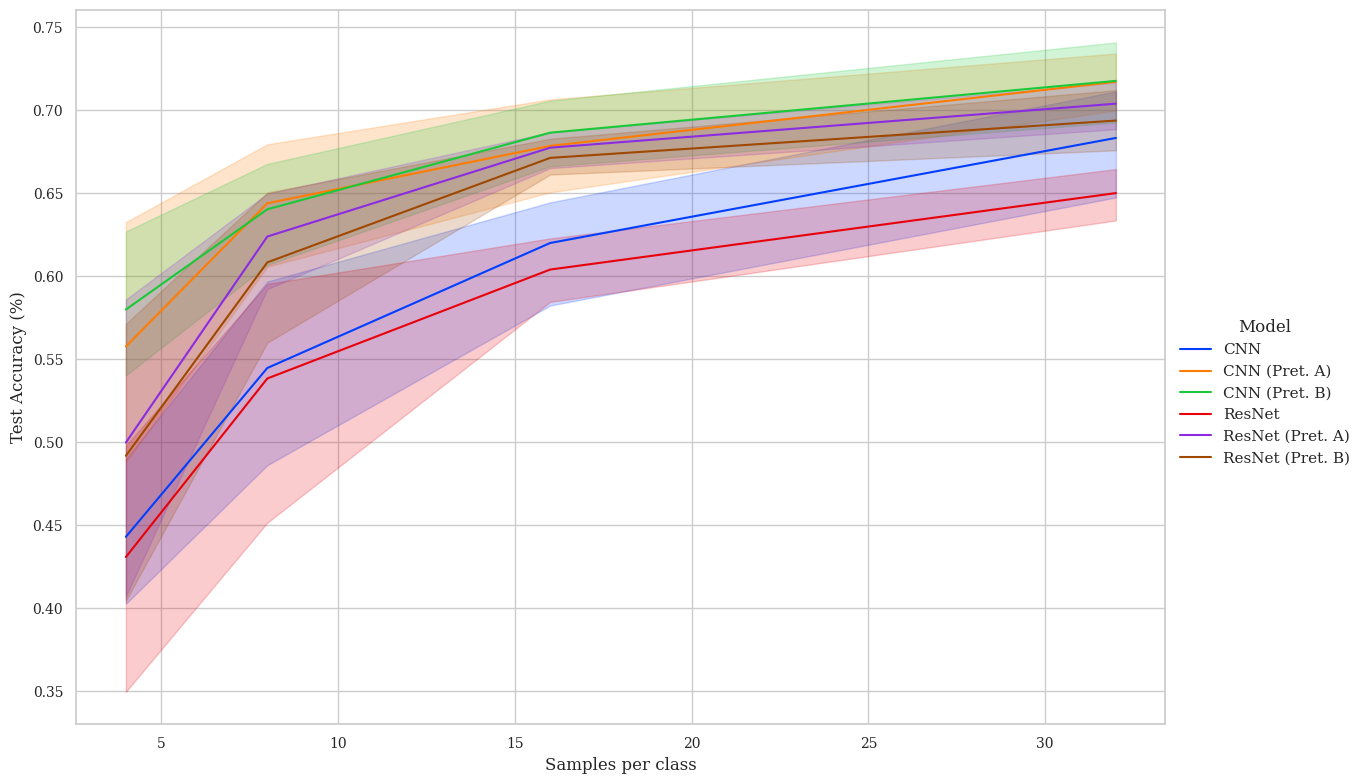

In [19]:
# Generate a plot
data["Model"] = data["arch"] + " " + data["pretrained"].replace({True: "(Pret. ", False: ""}) + data["stride_series"].replace({True: "B)", False: "A)"})
data["Model"].replace({"CNN A)": "CNN", "ResNet A)": "ResNet"}, inplace=True)
data.sort_values(['Model'], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="train_exc_limit", y="test_acc", hue='Model', kind="line", palette="bright",
                height=8, aspect=1.5, legend=True, facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Samples per class");

g.savefig("figures/pretrain.pdf", bbox_inches='tight')